In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("mobilenetv2v1.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
12983,adagrad,34.350,52.050,39.4244,2,348.0024,16,0.26609,0.92188
12984,adam,47.175,26.450,42.5518,2,261.0018,16,0.05710,0.97917
12985,adamax,41.950,55.550,34.3129,2,304.5021,16,0.13655,0.94271
12986,ftrl,49.975,37.400,39.8327,2,435.0031,16,0.29843,0.88542


In [3]:
df.optimizer.value_counts()

adagrad     1624
adam        1624
adamax      1624
ftrl        1624
nadam       1624
sgd         1623
rmsprop     1623
adadelta    1622
Name: optimizer, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    12988 non-null  object 
 1   cpu          12988 non-null  float64
 2   memory       12988 non-null  float64
 3   time         12988 non-null  float64
 4   epochs       12988 non-null  int64  
 5   predictions  12988 non-null  float64
 6   dataset      12988 non-null  int64  
 7   loss         12988 non-null  float64
 8   accuracy     12988 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 913.3+ KB


In [5]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [6]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,12988.000000,12988.000000,12988.000000,12988.0,12988.000000,12988.000000,12988.000000,12988.000000
mean,54.141842,63.052446,32.533233,2.0,240.015293,14.461118,0.234340,0.885077
std,6.575235,17.160908,5.740987,0.0,124.391274,2.691719,0.235811,0.157746
min,26.125000,15.925000,22.577100,2.0,43.500300,1.000000,0.004010,0.187500
25%,50.450000,50.650000,27.835025,2.0,130.500900,15.000000,0.086760,0.890620
50%,55.325000,76.025000,30.809900,2.0,217.501500,15.000000,0.131420,0.953120
75%,58.600000,78.075000,36.954975,2.0,348.002400,16.000000,0.279487,0.968750
max,81.400000,82.925000,58.564600,2.0,435.003100,16.000000,1.291500,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [8]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


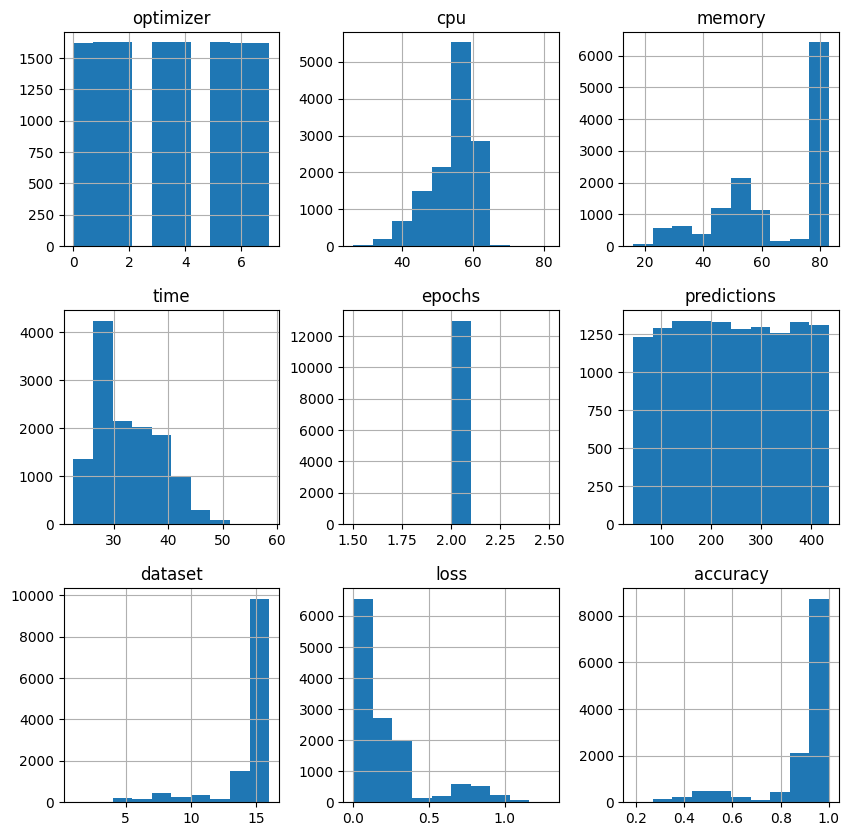

In [9]:
plot = df.hist(figsize=(10,10))

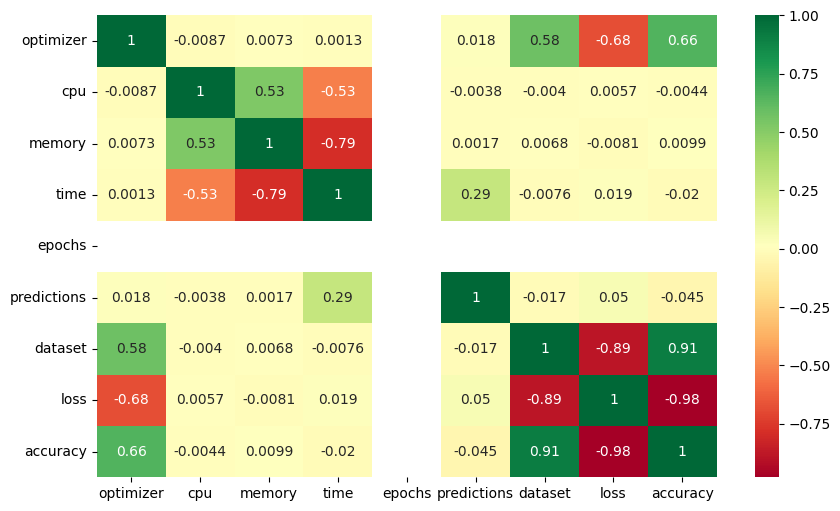

In [10]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [11]:
X = df[['dataset','loss','accuracy','time','cpu','memory','predictions']]
y = df['optimizer']

In [12]:
X.head()

,dataset,loss,accuracy,time,cpu,memory,predictions
0,15,0.29111,0.86458,26.9857,81.400,78.475,304.5021
1,16,0.06496,0.98438,32.0057,77.775,61.225,304.5021
2,15,0.07996,0.97396,46.2330,45.275,52.975,87.0006
3,15,0.30984,0.86979,32.9408,62.925,51.200,435.0031
4,15,0.11819,0.95312,30.7948,64.925,28.575,87.0006


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
X_train

array([[-0.17833312, -0.22631379,  0.19728225, ...,  0.75506073,
         0.85548592,  1.56755726],
       [ 0.57108142, -0.6939107 ,  0.52747731, ...,  0.60276444,
         0.92093128, -1.23497052],
       [ 0.57108142, -0.64094074,  0.42838075, ..., -0.81739848,
        -0.53050133, -0.88465465],
       ...,
       [-3.17599129,  3.08530713, -3.435117  , ...,  0.04307557,
         0.89475313, -0.88465465],
       [ 0.19637415, -0.5565796 ,  0.5605095 , ..., -1.03442069,
        -0.43015178,  1.21724058],
       [ 0.57108142, -0.65266464,  0.52747731, ...,  1.23860146,
         1.01546346,  0.16629297]])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
tree = DecisionTreeClassifier(max_depth=7)

tree.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(tree.score(X_test, y_test)))

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.576
Test set score: 0.553
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       0.80      0.79      0.79       405
           2       0.21      0.11      0.14       414
           3       0.63      0.64      0.63       404
           4       0.79      0.82      0.81       419
           5       0.30      0.14      0.19       377
           6       0.55      0.19      0.28       387
           7       0.27      0.68      0.39       426

    accuracy                           0.55      3247
   macro avg       0.57      0.55      0.53      3247
weighted avg       0.57      0.55      0.53      3247



In [18]:
rf = RandomForestClassifier(max_depth=8)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.625
Test set score: 0.567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       0.82      0.81      0.81       405
           2       0.30      0.16      0.21       414
           3       0.59      0.74      0.65       404
           4       0.80      0.83      0.81       419
           5       0.27      0.49      0.34       377
           6       0.47      0.22      0.30       387
           7       0.30      0.28      0.29       426

    accuracy                           0.57      3247
   macro avg       0.57      0.57      0.55      3247
weighted avg       0.57      0.57      0.56      3247



In [19]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.517
2,accuracy,0.309
0,dataset,0.114
6,predictions,0.020
3,time,0.017
5,memory,0.013
4,cpu,0.010


In [20]:
xg = XGBClassifier(n_estimators=29)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.742
Test set score: 0.587
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       0.81      0.81      0.81       405
           2       0.29      0.25      0.27       414
           3       0.67      0.75      0.71       404
           4       0.81      0.83      0.82       419
           5       0.29      0.40      0.34       377
           6       0.50      0.28      0.36       387
           7       0.32      0.34      0.33       426

    accuracy                           0.59      3247
   macro avg       0.59      0.58      0.58      3247
weighted avg       0.59      0.59      0.58      3247



In [21]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.511
2,accuracy,0.208
6,predictions,0.098
0,dataset,0.075
3,time,0.039
5,memory,0.037
4,cpu,0.031


In [22]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.6, max_iter=500)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.536
Test set score: 0.540
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       415
           1       0.82      0.80      0.81       405
           2       0.25      0.15      0.19       414
           3       0.60      0.66      0.63       404
           4       0.80      0.86      0.83       419
           5       0.28      0.36      0.32       377
           6       0.18      0.25      0.21       387
           7       0.35      0.23      0.28       426

    accuracy                           0.54      3247
   macro avg       0.53      0.54      0.53      3247
weighted avg       0.54      0.54      0.53      3247



Neural Networks

In [23]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the optimizer labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
num_classes = y_encoded.shape[1]

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded)

In [24]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [25]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

# Fit the model to the training data
history = model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=64, callbacks=[early_stopping], validation_data=(X_test_nn, y_test_nn))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/200
153/153 [==============================] - 4s 8ms/step - loss: 1.5975 - accuracy: 0.3886 - val_loss: 2.2890 - val_accuracy: 0.1706
Epoch 2/200
153/153 [==============================] - 1s 6ms/step - loss: 1.2525 - accuracy: 0.4601 - val_loss: 1.9086 - val_accuracy: 0.2316
Epoch 3/200
153/153 [==============================] - 1s 6ms/step - loss: 1.1576 - accuracy: 0.4924 - val_loss: 1.6823 - val_accuracy: 0.4262
Epoch 4/200
153/153 [==============================] - 1s 6ms/step - loss: 1.0905 - accuracy: 0.5215 - val_loss: 1.2227 - val_accuracy: 0.4783
Epoch 5/200
153/153 [==============================] - 1s 6ms/step - loss: 1.0656 - accuracy: 0.5290 - val_loss: 1.4596 - val_accuracy: 0.4312
Epoch 6/200
153/153 [==============================] - 1s 6ms/step - loss: 1.0353 - accuracy: 0.5407 - val_loss: 1.0479 - val_accuracy: 0.5199
Epoch 7/200
153/153 [==============================] - 1s 6ms/step - loss: 1.0238 - accuracy: 0.5443 - val_loss: 0.9973 - val_accuracy: 0.5497

Minimum validation loss: 0.902


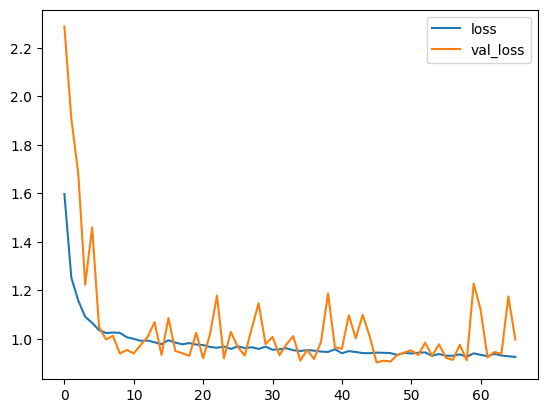

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:.3f}".format(history_df['val_loss'].min()))

Max val_accuracy: 0.599


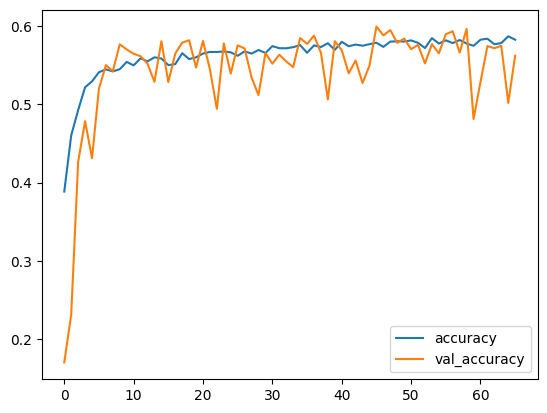

In [27]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Max val_accuracy: {:.3f}".format(history_df['val_accuracy'].max()))

Saving the model

In [32]:
import os
from keras.models import load_model

# Save the trained model
model.save('model.h5')

# Save the fitted scaler and encoder objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

model.summary()

# Make predictions
def predict_best_optimizer(model, cpu, memory, dataset, loss, accuracy, time, predictions):
    input_data = np.array([[cpu, memory, dataset, loss, accuracy, time, predictions]])
    input_scaled = scaler.transform(input_data)
    probabilities = model.predict(input_scaled)
    best_optimizer_idx = np.argmax(probabilities)
    best_optimizer_onehot = np.zeros((1, probabilities.shape[1]))
    best_optimizer_onehot[0, best_optimizer_idx] = 1
    best_optimizer = encoder.inverse_transform(best_optimizer_onehot)[0][0]
    return best_optimizer

# Load the saved model
loaded_model = load_model('model.h5')
# Example usage
best_optimizer = predict_best_optimizer(loaded_model, cpu=81.4, memory=20, dataset=200,loss=0.09, accuracy=0.9, time=25, predictions=300)
print("Best optimizer:", best_optimizer)

if os.path.exists('model.h5'):
  os.remove('model.h5')

if os.path.exists('scaler.pkl'):
  os.remove('scaler.pkl')

if os.path.exists('encoder.pkl'):
  os.remove('encoder.pkl')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               1

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
